In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pytz

In [3]:
od_data = pd.read_csv("output/NYCTAXI202310-202403_OD/NYCTAXI202310-202403.od")

In [4]:
od_data.head(5)

,dyna_id,type,time,origin_id,destination_id,flow
0,0,state,2023-10-01T00:00:00Z,0,0,0.0
1,1,state,2023-10-01T01:00:00Z,0,0,0.0
2,2,state,2023-10-01T02:00:00Z,0,0,0.0
3,3,state,2023-10-01T03:00:00Z,0,0,0.0
4,4,state,2023-10-01T04:00:00Z,0,0,0.0


In [5]:
od_data.shape

(303721079, 6)

将世界标准时间转换为纽约所在时区时间并提取小时和日期信息

In [6]:
od_data['time'] = pd.to_datetime(od_data['time'])
od_data['time'] = od_data['time'].dt.tz_convert('America/New_York')
od_data['hour'] = od_data['time'].dt.hour
od_data['date'] = od_data['time'].dt.date

In [7]:
od_data

,dyna_id,type,time,origin_id,destination_id,flow,hour,date
0,0,state,2023-09-30 20:00:00-04:00,0,0,0.0,20,2023-09-30
1,1,state,2023-09-30 21:00:00-04:00,0,0,0.0,21,2023-09-30
2,2,state,2023-09-30 22:00:00-04:00,0,0,0.0,22,2023-09-30
3,3,state,2023-09-30 23:00:00-04:00,0,0,0.0,23,2023-09-30
4,4,state,2023-10-01 00:00:00-04:00,0,0,0.0,0,2023-10-01
...,...,...,...,...,...,...,...,...
303721074,303721074,state,2024-03-31 14:00:00-04:00,262,262,0.0,14,2024-03-31
303721075,303721075,state,2024-03-31 15:00:00-04:00,262,262,0.0,15,2024-03-31
303721076,303721076,state,2024-03-31 16:00:00-04:00,262,262,0.0,16,2024-03-31
303721077,303721077,state,2024-03-31 17:00:00-04:00,262,262,0.0,17,2024-03-31


hour
0      80367.0
1     141775.0
2     293202.0
3     457332.0
4     544192.0
5     589451.0
6     626402.0
7     681602.0
8     710039.0
9     732433.0
10    766794.0
11    770723.0
12    832612.0
13    933997.0
14    908730.0
15    827321.0
16    811976.0
17    779723.0
18    653614.0
19    475051.0
20    332490.0
21    227635.0
22    150114.0
23    100916.0
Name: flow, dtype: float64


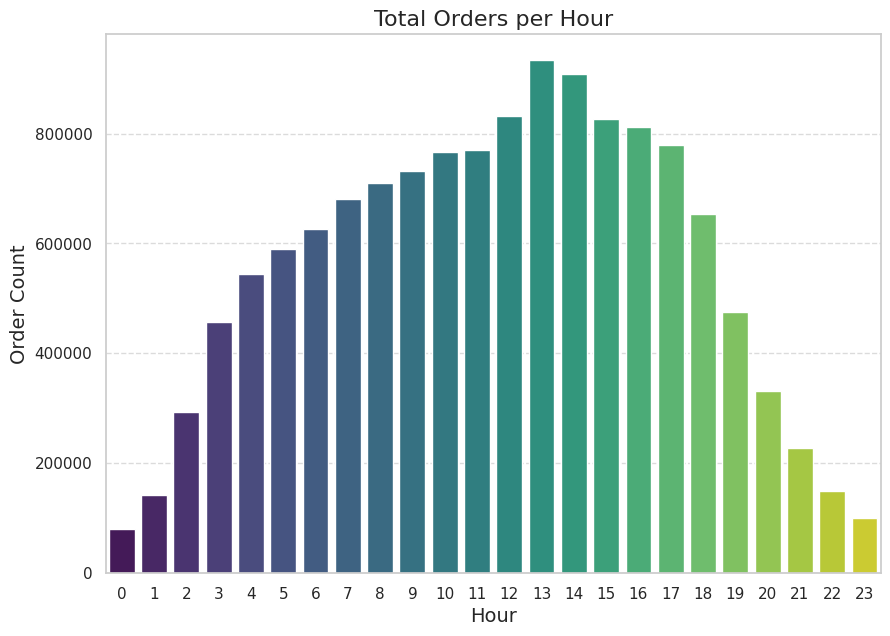

In [33]:
od_data = od_data[4:]
# 按小时进行累加
hourly_flow = od_data.groupby('hour')['flow'].sum()

# 打印累计的小时流量
print(hourly_flow)

# 设置seaborn样式
sns.set(style="whitegrid")

# 创建绘图
plt.figure(figsize=(10, 7))
bar_plot = sns.barplot(x=hourly_flow.index, y=hourly_flow.values, palette="viridis")

# 添加标题和标签
bar_plot.set_title('Total Orders per Hour', fontsize=16)
bar_plot.set_xlabel('Hour', fontsize=14)
bar_plot.set_ylabel('Order Count', fontsize=14)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0)

# 显示网格
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示绘图
plt.savefig("data_analyse_result/Total Orders per Hour_nyctimever.png",dpi=300)
plt.show()

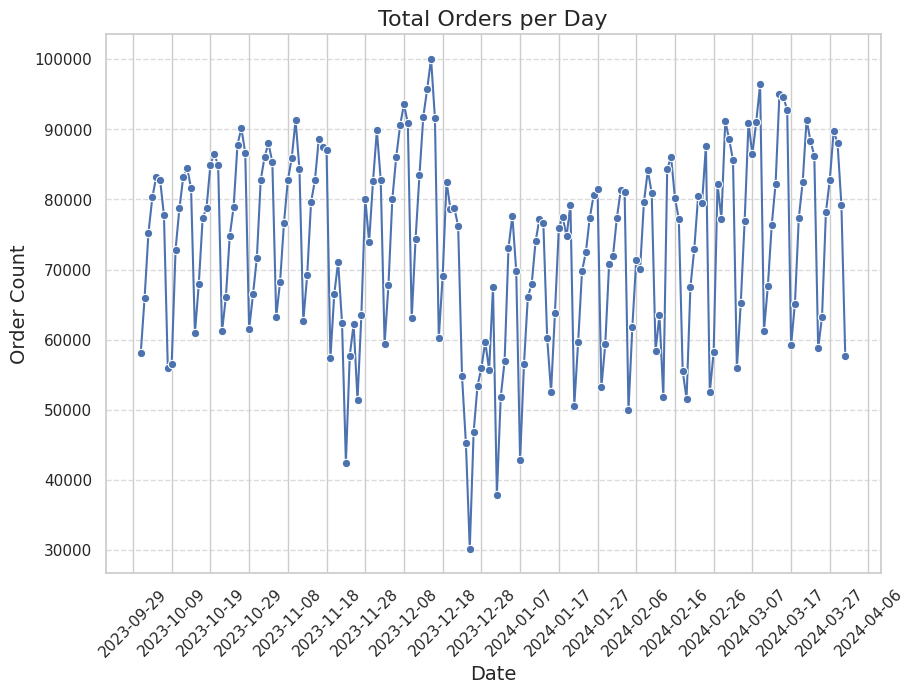

In [19]:
# 按日期计算总订单量
daily_orders = od_data.groupby('date')['flow'].sum()
temp = daily_orders.reset_index()

sns.set(style="whitegrid")

# 创建绘图
plt.figure(figsize=(10, 7))
line_plot = sns.lineplot(x=temp["date"], y=temp["flow"], marker='o', color='b')

# 添加标题和标签
line_plot.set_title('Total Orders per Day', fontsize=16)
line_plot.set_xlabel('Date', fontsize=14)
line_plot.set_ylabel('Order Count', fontsize=14)
# line_plot.set_xticklabels(line_plot.get_xticks(), rotation=45)

# 格式化横轴为日期格式
line_plot.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
line_plot.xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=10))  # 每10天显示一个日期
plt.xticks(rotation=45)

# 显示网格
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示绘图
plt.savefig("data_analyse_result/Total Orders per Day_nyctimever.png",dpi=300)
plt.show()


R时间序列分析准备

In [37]:
# 按日期和小时计算总订单量
hourly_orders = od_data.groupby(['date', 'hour'])['flow'].sum().reset_index()
temp = hourly_orders.reset_index()

In [38]:
temp.to_csv("visual_csv/date_hour_flow_nyctimever.csv")

时空数据绘图准备+转换纽约时区

In [12]:
yellow_data = pd.read_csv("input/NYC-Taxi/yellow_tripdata_2024-01.csv")
green_data = pd.read_csv("input/NYC-Taxi/green_tripdata_2024-01.csv")

/root/anaconda3/envs/libcity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
yellow_data = yellow_data[["tpep_pickup_datetime","tpep_dropoff_datetime","PULocationID","DOLocationID"]]
green_data = green_data[["lpep_pickup_datetime","lpep_dropoff_datetime","PULocationID","DOLocationID"]]
green_data = green_data.rename(columns={'lpep_pickup_datetime':'tpep_pickup_datetime',"lpep_dropoff_datetime":"tpep_dropoff_datetime"})
january = pd.concat([yellow_data,green_data])

In [17]:
january['tpep_pickup_datetime'] = pd.to_datetime(january['tpep_pickup_datetime'])
january['tpep_pickup_datetime'] = january['tpep_pickup_datetime'].dt.tz_localize('UTC')
january['tpep_pickup_datetime'] = january['tpep_pickup_datetime'].dt.tz_convert('America/New_York')

In [18]:
january

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID
0,2023-12-31 19:57:55-05:00,2024-01-01 01:17:43,186,79
1,2023-12-31 19:03:00-05:00,2024-01-01 00:09:36,140,236
2,2023-12-31 19:17:06-05:00,2024-01-01 00:35:01,236,79
3,2023-12-31 19:36:38-05:00,2024-01-01 00:44:56,79,211
4,2023-12-31 19:46:51-05:00,2024-01-01 00:52:57,211,148
...,...,...,...,...
56546,2024-01-31 15:46:00-05:00,2024-01-31 20:55:00,33,25
56547,2024-01-31 16:06:00-05:00,2024-01-31 21:11:00,72,72
56548,2024-01-31 16:36:00-05:00,2024-01-31 21:40:00,72,72
56549,2024-01-31 17:45:00-05:00,2024-01-31 22:51:00,41,42


In [19]:
january['date'] = pd.to_datetime(january['tpep_pickup_datetime']).dt.date
january1_1 = january[january['date']==pd.to_datetime('2024-01-01').date()]
january1_1 = january1_1.drop(columns="date")
# 删除 PULocationID 或 DOLocationID 中至少一个为 264 或 265 的行
january1_1 = january1_1[~((january1_1['PULocationID'].isin([264, 265])) | (january1_1['DOLocationID'].isin([264, 265])))]

In [20]:
geo_data = pd.read_csv("output/NYCTAXI202310-202403_OD/NYCTAXI202310-202403.geo")

In [23]:
import ast
import random

# 将coordinates字符串转换为列表
geo_data['coordinates'] = geo_data['coordinates'].apply(ast.literal_eval)

# 创建字典用于查找geo_id对应的随机经纬度
geo_coordinates = {row['geo_id']: row['coordinates'][0] if row['type'] == "Polygon" else row['coordinates'][0][0] for _, row in geo_data.iterrows()}

# 定义一个函数来从坐标中随机选择一个经纬度对
def get_random_coordinates(geo_id):
    coordinates = geo_coordinates[geo_id-1]
    return random.choice(coordinates)

# 新增四列
january1_1['PULocation'] = january1_1['PULocationID'].apply(get_random_coordinates)
january1_1['DOLocation'] = january1_1['DOLocationID'].apply(get_random_coordinates)

In [24]:
january1_1

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,PULocation,DOLocation
22926,2024-01-01 00:27:48-05:00,2024-01-01 05:30:01,50,163,"[-73.99547450, 40.75962686]","[-73.98136214, 40.76783674]"
22927,2024-01-01 00:51:02-05:00,2024-01-01 05:57:18,142,68,"[-73.98145350, 40.76832060]","[-73.99775837, 40.75648753]"
22928,2024-01-01 00:37:19-05:00,2024-01-01 05:38:36,141,141,"[-73.96164363, 40.76005959]","[-73.96429790, 40.76468199]"
22929,2024-01-01 00:58:56-05:00,2024-01-01 06:04:45,263,237,"[-73.95126173, 40.77429194]","[-73.96936485, 40.76927066]"
22930,2024-01-01 00:02:53-05:00,2024-01-01 05:12:36,142,68,"[-73.98184381, 40.76760969]","[-73.99709903, 40.74720510]"
...,...,...,...,...,...,...
53214,2024-01-01 22:57:00-05:00,2024-01-02 04:20:00,37,173,"[-73.89674966, 40.68149203]","[-73.87365722, 40.75680349]"
53215,2024-01-01 23:08:00-05:00,2024-01-02 04:24:00,191,132,"[-73.75462716, 40.72258094]","[-73.75375784, 40.63339778]"
53216,2024-01-01 23:47:00-05:00,2024-01-02 05:03:00,49,138,"[-73.96189838, 40.69818833]","[-73.85820236, 40.77030738]"
53217,2024-01-01 23:20:00-05:00,2024-01-02 04:45:00,97,132,"[-73.98154757, 40.69357779]","[-73.82476320, 40.64956819]"


In [25]:
january1_1['PULocation_lon'] = january1_1['PULocation'].apply(lambda x: x[0])
january1_1['PULocation_lat'] = january1_1['PULocation'].apply(lambda x: x[1])
january1_1['DOLocation_lon'] = january1_1['DOLocation'].apply(lambda x: x[0])
january1_1['DOLocation_lat'] = january1_1['DOLocation'].apply(lambda x: x[1])

In [26]:
january1_1.drop(columns=['PULocation', 'DOLocation', 'PULocationID', 'DOLocationID'], inplace=True)
january1_1.to_csv("visualized_data/visualize_1_1_nyctime.csv")

以区域点中心绘图

In [2]:
import json
# 计算每个区域的经纬度中心点
location = json.load(open('input/NYC-Taxi/taxi_zones_final.json', 'r'))
id_list = []
id2lon = {}
id2lat = {}
id2str = {}
id2type = {}
for i in range(len(location['features'])):
    idx = location['features'][i]['properties']['OBJECTID']
    id_list.append(idx)
    id2lon[idx] = []
    id2lat[idx] = []
    id2str[idx] = str(location['features'][i]['geometry']['coordinates'])
    id_type = location['features'][i]['geometry']['type']
    id2type[idx] = id_type
    if id_type == 'Polygon':
        for i1 in range(len(location['features'][i]['geometry']['coordinates'])):
            for i2 in range(len(location['features'][i]['geometry']['coordinates'][i1])):
                id2lon[idx].append(eval(location['features'][i]['geometry']['coordinates'][i1][i2][0]))
                id2lat[idx].append(eval(location['features'][i]['geometry']['coordinates'][i1][i2][1]))
    elif id_type == 'MultiPolygon':
        for i1 in range(len(location['features'][i]['geometry']['coordinates'])):
            for i2 in range(len(location['features'][i]['geometry']['coordinates'][i1])):
                for i3 in range(len(location['features'][i]['geometry']['coordinates'][i1][i2])):
                    id2lon[idx].append(eval(location['features'][i]['geometry']['coordinates'][i1][i2][i3][0]))
                    id2lat[idx].append(eval(location['features'][i]['geometry']['coordinates'][i1][i2][i3][1]))
    else:
        print('error', i)
    # 计算每个区域的经纬度中心点
    id2lon[idx] = sum(id2lon[idx]) / len(id2lon[idx])
    id2lat[idx] = sum(id2lat[idx]) / len(id2lat[idx])

In [11]:
january1_1['PULocation_lon'] = january1_1['PULocationID'].apply(lambda x: id2lon[x])
january1_1['PULocation_lat'] = january1_1['PULocationID'].apply(lambda x: id2lat[x])
january1_1['DOLocation_lon'] = january1_1['DOLocationID'].apply(lambda x: id2lon[x])
january1_1['DOLocation_lat'] = january1_1['DOLocationID'].apply(lambda x: id2lat[x])

In [13]:
january1_1.to_csv("visualized_data/region_center_visualize_1_1.csv")

将str形式的坐标转换为float形式，同时转换单引号为双引号匹配kepler中的绘图格式

In [ ]:
json_file = pd.read_json("visualized_data/NYCTAXI202401-202403_geo.json")

In [11]:
for i in range(len(json_file['features'])):
    idx = json_file['features'][i]['properties']['geo_id']
    id_type = json_file['features'][i]['geometry']['type']
    if id_type == 'Polygon':
        for i1 in range(len(json_file['features'][i]['geometry']['coordinates'])):
            for i2 in range(len(json_file['features'][i]['geometry']['coordinates'][i1])):
                float_coor = []
                float_coor.append(float(json_file['features'][i]['geometry']['coordinates'][i1][i2][0]))
                float_coor.append(float(json_file['features'][i]['geometry']['coordinates'][i1][i2][1]))
                json_file['features'][i]['geometry']['coordinates'][i1][i2] = float_coor
    elif id_type == 'MultiPolygon':
        for i1 in range(len(json_file['features'][i]['geometry']['coordinates'])):
            for i2 in range(len(json_file['features'][i]['geometry']['coordinates'][i1])):
                for i3 in range(len(json_file['features'][i]['geometry']['coordinates'][i1][i2])):
                    float_coor = []
                    float_coor.append(float(json_file['features'][i]['geometry']['coordinates'][i1][i2][i3][0]))
                    float_coor.append(float(json_file['features'][i]['geometry']['coordinates'][i1][i2][i3][1]))
                    json_file['features'][i]['geometry']['coordinates'][i1][i2][i3] = float_coor
    else:
        print('error', i)

In [12]:
json_file['geo_id'] = range(0,len(json_file))
for id in json_file["features"]:
    id.pop('properties')
json_file["features"] = json_file["features"].apply(lambda x: str(x).replace("'", '"'))
json_file.to_csv('visual_csv/kepler_geojson.csv')

社群检测可视化准备，匹配geojson

In [25]:
community = pd.read_csv("visual_csv/geo_community_Night_Infomap.csv")
geo_json = pd.read_csv('visual_csv/kepler_geojson.csv')

In [27]:
merge_data = pd.merge(left=community, right=geo_json, on="geo_id")
merge_data = merge_data[["geo_id","community","features"]]
merge_data

,geo_id,community,features
0,0,0.0,"{""type"": ""Feature"", ""geometry"": {""type"": ""Poly..."
1,1,3.0,"{""type"": ""Feature"", ""geometry"": {""type"": ""Mult..."
2,2,4.0,"{""type"": ""Feature"", ""geometry"": {""type"": ""Poly..."
3,3,0.0,"{""type"": ""Feature"", ""geometry"": {""type"": ""Poly..."
4,4,6.0,"{""type"": ""Feature"", ""geometry"": {""type"": ""Poly..."
...,...,...,...
258,258,4.0,"{""type"": ""Feature"", ""geometry"": {""type"": ""Poly..."
259,259,2.0,"{""type"": ""Feature"", ""geometry"": {""type"": ""Poly..."
260,260,0.0,"{""type"": ""Feature"", ""geometry"": {""type"": ""Poly..."
261,261,0.0,"{""type"": ""Feature"", ""geometry"": {""type"": ""Mult..."


In [28]:
merge_data.to_csv("visual_csv/visual_community_night_infomap.csv")

矩形划分绘制

In [ ]:
from PIL import Image, ImageDraw

def draw_grid(image_path, grid_size, color, output_path):
    # Open an image file
    with Image.open(image_path).convert('RGBA') as img:
        width, height = img.size
        left = (width - grid_size) // 2
        top = (height - grid_size) // 2
        right = left + grid_size
        bottom = top + grid_size
        
        # Create a transparent overlay
        overlay = Image.new('RGBA', img.size, (255, 255, 255, 50))
        draw = ImageDraw.Draw(overlay)
        
        # Draw the grid lines and fill the grid cells with color
        cell_size = grid_size // 15 
        for i in range(left, right, cell_size):
            for j in range(top, bottom, cell_size):
                # Draw the rectangle (cell)
                draw.rectangle([i, j, i + cell_size, j + cell_size], outline='red', fill=color)
        
        # Combine the original image with the overlay
        combined = Image.alpha_composite(img, overlay)
        
        # Save the modified image
        combined.save(output_path)

# Example usage
image_path = 'proj/可视化材料/矩形划分.png'
output_path = 'proj/可视化材料/modified_image.png'
grid_size = 700  # Size of the square grid in pixels
color = (255, 102, 102, 64)
draw_grid(image_path, grid_size, color, output_path)